# Marvel Cinematic Universe (The Infinity Saga)
https://www.marvel.com/movies

### Foreword.

The Marvel Cinematic Universe has been a tremendous success at the box office since 2008. Despite the rights of more popular characters being sold to <b>Sony</b> <i>(Spider-Man)</i> and <b>Fox</b> <i>(X-Men)</i>, Marvel's in-house studio was able to build franchises out of the charcters <i>Iron Man</i>, <i>Captain America</i>, and <i>Thor</i>, cumulating into <b>four</b> Avengers movies that is a franchise within a franchise. With the end of Thanos, the <i>Infinity Saga</i> has come to an end. After 23 films, how well did the films do altogether?

In [1]:
from bs4 import BeautifulSoup as bs
import requests

import re

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
r = requests.get("https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_films#Reception")
soup = bs(r.content)
contents = soup.prettify()

Let's grab the names of the 23 films of the <i>Infinity Saga</i>.

In [3]:
info_box_names = soup.select(".wikitable.plainrowheaders.sortable i")
mcu_film_names = [info_box_names[i].a['title'] for i in range(23)]
mcu_film_names

['Iron Man (2008 film)',
 'The Incredible Hulk (film)',
 'Iron Man 2',
 'Thor (film)',
 'Captain America: The First Avenger',
 'The Avengers (2012 film)',
 'Iron Man 3',
 'Thor: The Dark World',
 'Captain America: The Winter Soldier',
 'Guardians of the Galaxy (film)',
 'Avengers: Age of Ultron',
 'Ant-Man (film)',
 'Captain America: Civil War',
 'Doctor Strange (2016 film)',
 'Guardians of the Galaxy Vol. 2',
 'Spider-Man: Homecoming',
 'Thor: Ragnarok',
 'Black Panther (film)',
 'Avengers: Infinity War',
 'Ant-Man and the Wasp',
 'Captain Marvel (film)',
 'Avengers: Endgame',
 'Spider-Man: Far From Home']

Let's grab the release dates of each film.

In [4]:
info_box_data = soup.select(".wikitable.plainrowheaders.sortable td")
mcu_film_release = [info_box_data[i].get_text('',strip=True) for i in range(1, 184, 8)]
mcu_film_release

['May 2, 2008',
 'June 13, 2008',
 'May 7, 2010',
 'May 6, 2011',
 'July 22, 2011',
 'May 4, 2012',
 'May 3, 2013',
 'November 8, 2013',
 'April 4, 2014',
 'August 1, 2014',
 'May 1, 2015',
 'July 17, 2015',
 'May 6, 2016',
 'November 4, 2016',
 'May 5, 2017',
 'July 7, 2017',
 'November 3, 2017',
 'February 16, 2018',
 'April 27, 2018',
 'July 6, 2018',
 'March 8, 2019',
 'April 26, 2019',
 'July 2, 2019']

Let's grab the box office earnings of each film.

In [5]:
mcu_film_earnings = [info_box_data[i].get_text('',strip=True) for i in range(4, 184, 8)]
mcu_film_earnings_cleaned = [int(''.join(re.findall(r'[0-9]+', mcu_film_earnings[i]))) for i in range(len(mcu_film_earnings))]
mcu_film_earnings_cleaned

[585796247,
 264770996,
 623933331,
 449326618,
 370569774,
 1518815515,
 1214811252,
 644783140,
 714421503,
 772778185,
 1402805868,
 519311965,
 1153296293,
 677718395,
 863756051,
 880166924,
 853977126,
 1347280161,
 2048359754,
 622674139,
 1128275263,
 2797800564,
 1131927996]

Let's grab the budget of each film.

In [6]:
mcu_film_budget = [info_box_data[i].get_text('',strip=True) for i in range(7, 184, 8)]
mcu_film_budget_cleaned = [int(re.findall(r'[0-9]+', mcu_film_budget[i])[0])*1000000 for i in range(len(mcu_film_budget))]
mcu_film_budget_cleaned

[140000000,
 150000000,
 200000000,
 150000000,
 140000000,
 220000000,
 178000000,
 152000000,
 177000000,
 195000000,
 365000000,
 109000000,
 230000000,
 165000000,
 200000000,
 175000000,
 180000000,
 200000000,
 325000000,
 162000000,
 150000000,
 356000000,
 160000000]

Let's grab the <b>Rotten Tomatoes</b> review data of each film.

In [7]:
mcu_film_rt_ratings = [info_box_data[i].get_text('',strip=True) for i in range(186, 255, 3)]
mcu_film_rt_ratings_cleaned = [re.findall(r'[0-9]+', mcu_film_rt_ratings[i]) for i in range(len(mcu_film_rt_ratings))]
mcu_film_rt_ratings_cleaned

[['94', '281', '294'],
 ['67', '238', '296'],
 ['72', '304', '298'],
 ['77', '291', '300'],
 ['80', '273', '302'],
 ['91', '362', '304'],
 ['79', '328', '306'],
 ['66', '284', '308'],
 ['90', '306', '310'],
 ['92', '332', '312'],
 ['76', '373', '314'],
 ['83', '335', '316'],
 ['90', '422', '318'],
 ['89', '382', '320'],
 ['85', '421', '322'],
 ['92', '393', '324'],
 ['93', '434', '326'],
 ['96', '523', '328'],
 ['85', '480', '330'],
 ['87', '435', '332'],
 ['79', '537', '334'],
 ['94', '541', '336'],
 ['90', '448', '338']]

In [8]:
mcu_film_rt_ratings_pt = [int(re.findall(r'[0-9]+', mcu_film_rt_ratings[i])[0]) for i in range(len(mcu_film_rt_ratings))]
mcu_film_rt_ratings_pt

[94,
 67,
 72,
 77,
 80,
 91,
 79,
 66,
 90,
 92,
 76,
 83,
 90,
 89,
 85,
 92,
 93,
 96,
 85,
 87,
 79,
 94,
 90]

In [9]:
mcu_film_rt_ratings_rw = [int(re.findall(r'[0-9]+', mcu_film_rt_ratings[i])[1]) for i in range(len(mcu_film_rt_ratings))]
mcu_film_rt_ratings_rw

[281,
 238,
 304,
 291,
 273,
 362,
 328,
 284,
 306,
 332,
 373,
 335,
 422,
 382,
 421,
 393,
 434,
 523,
 480,
 435,
 537,
 541,
 448]

Let's grab the <b>Metacritic</b> review data of each film.

In [10]:
mcu_film_mc_ratings = [info_box_data[i].get_text('',strip=True) for i in range(187, 255, 3)]
mcu_film_mc_ratings_cleaned = [re.findall(r'[0-9]+', mcu_film_mc_ratings[i]) for i in range(len(mcu_film_mc_ratings))]
mcu_film_mc_ratings_cleaned

[['79', '38', '295'],
 ['61', '38', '297'],
 ['57', '40', '299'],
 ['57', '40', '301'],
 ['66', '43', '303'],
 ['69', '43', '305'],
 ['62', '44', '307'],
 ['54', '44', '309'],
 ['70', '48', '311'],
 ['76', '53', '313'],
 ['66', '49', '315'],
 ['64', '44', '317'],
 ['75', '53', '319'],
 ['72', '49', '321'],
 ['67', '48', '323'],
 ['73', '51', '325'],
 ['74', '51', '327'],
 ['88', '55', '329'],
 ['68', '54', '331'],
 ['70', '56', '333'],
 ['64', '56', '335'],
 ['78', '57', '337'],
 ['69', '55', '339']]

In [11]:
mcu_film_mc_ratings_pt = [int(re.findall(r'[0-9]+', mcu_film_mc_ratings[i])[0]) for i in range(len(mcu_film_mc_ratings))]
mcu_film_mc_ratings_pt

[79,
 61,
 57,
 57,
 66,
 69,
 62,
 54,
 70,
 76,
 66,
 64,
 75,
 72,
 67,
 73,
 74,
 88,
 68,
 70,
 64,
 78,
 69]

In [12]:
mcu_film_mc_ratings_rw = [int(re.findall(r'[0-9]+', mcu_film_mc_ratings[i])[1]) for i in range(len(mcu_film_mc_ratings))]
mcu_film_mc_ratings_rw

[38,
 38,
 40,
 40,
 43,
 43,
 44,
 44,
 48,
 53,
 49,
 44,
 53,
 49,
 48,
 51,
 51,
 55,
 54,
 56,
 56,
 57,
 55]

Done! Let's build our data frame with all the data provided.

In [13]:
mcudata = pd.DataFrame(mcu_film_names, columns = ['Film'])
mcudata

,Film
0,Iron Man (2008 film)
1,The Incredible Hulk (film)
2,Iron Man 2
3,Thor (film)
4,Captain America: The First Avenger
5,The Avengers (2012 film)
6,Iron Man 3
7,Thor: The Dark World
8,Captain America: The Winter Soldier
9,Guardians of the Galaxy (film)


Now adding in the rest of everything else...

In [14]:
mcudata['Date'] = mcu_film_release
mcudata['Earning'] = mcu_film_earnings_cleaned
mcudata['Budget'] = mcu_film_budget_cleaned
mcudata['Profit'] = mcudata['Earning']-mcudata['Budget']
mcudata['Return'] = mcudata['Earning']/mcudata['Budget']
mcudata['Rotten Tomatoes Ratings'] = mcu_film_rt_ratings_pt
mcudata['Rotten Tomatoes Reviews'] = mcu_film_rt_ratings_rw
mcudata['Metacritic Ratings'] = mcu_film_mc_ratings_pt
mcudata['Metacritic Reviews'] = mcu_film_mc_ratings_rw
mcudata['Year'] = [mcudata['Date'][i][-4:] for i in range(len(mcudata))]
mcudata['Runtime'] = [126, 112, 125, 114, 124, 143, 131, 112, 136, 122, 141, 117, 147, 115, 137, 133, 130, 134, 149, 118, 124, 181, 129]
mcudata['Phase'] = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

mcudata

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
0,Iron Man (2008 film),"May 2, 2008",585796247,140000000,445796247,4.184259,94,281,79,38,2008,126,1
1,The Incredible Hulk (film),"June 13, 2008",264770996,150000000,114770996,1.765140,67,238,61,38,2008,112,1
2,Iron Man 2,"May 7, 2010",623933331,200000000,423933331,3.119667,72,304,57,40,2010,125,1
3,Thor (film),"May 6, 2011",449326618,150000000,299326618,2.995511,77,291,57,40,2011,114,1
4,Captain America: The First Avenger,"July 22, 2011",370569774,140000000,230569774,2.646927,80,273,66,43,2011,124,1
5,The Avengers (2012 film),"May 4, 2012",1518815515,220000000,1298815515,6.903707,91,362,69,43,2012,143,1
6,Iron Man 3,"May 3, 2013",1214811252,178000000,1036811252,6.824782,79,328,62,44,2013,131,2
7,Thor: The Dark World,"November 8, 2013",644783140,152000000,492783140,4.241994,66,284,54,44,2013,112,2
8,Captain America: The Winter Soldier,"April 4, 2014",714421503,177000000,537421503,4.036280,90,306,70,48,2014,136,2
9,Guardians of the Galaxy (film),"August 1, 2014",772778185,195000000,577778185,3.962965,92,332,76,53,2014,122,2


That should do it! Let's answer some questions.

### How many movies were released per year?

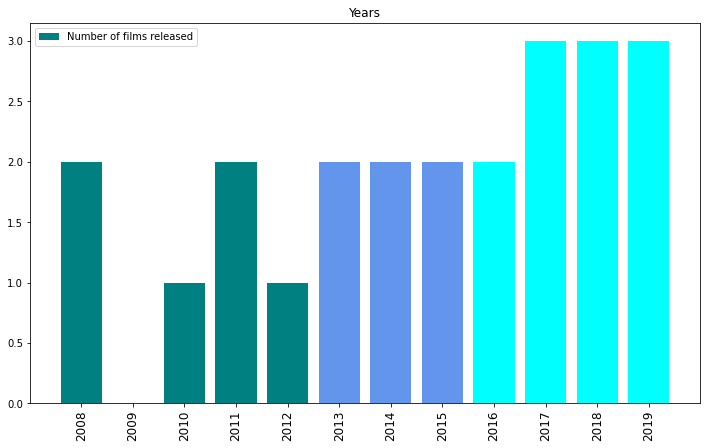

In [15]:
releaseyears = [i for i in range(2008, 2020)]
releaseschedule = [mcudata.loc[(mcudata['Year'] == f'{releaseyears[i]}')].count()[0] for i in range(len(releaseyears))]
colors = ['teal', 'teal', 'teal', 'teal', 'teal', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cyan', 'cyan', 'cyan', 'cyan',]

plt.figure(figsize=(12,7))

plt.title('Years')
plt.bar(np.arange(len(releaseyears)), releaseschedule, label='Number of films released', color=colors)
plt.xticks(range(len(releaseyears)), releaseyears, rotation='vertical', size=12)

plt.legend()

plt.show()

After the release of <b>The Incredible Hulk</b> and <b>Iron Man</b> in 2008, there were no releases the next year. Things picked back up with <b>Iron Man 2</b> in 2010, and <b>Thor</b> and <b>Captain America</b> were released in 2011. 2012's sole release was <b>The Avengers</b>, but after that, releases would be much more consistent.

<i>Phase Two</i> always had two releases, and <i>Phase Three</i> almost always had three.

### How many films were released per phase?

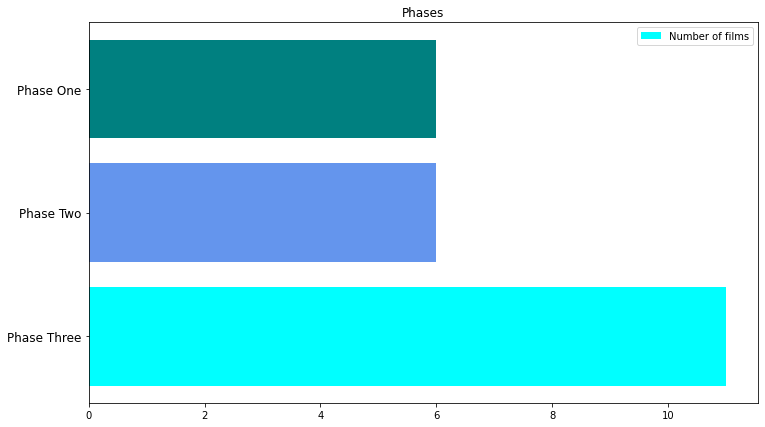

In [16]:
phasefilmcount = [mcudata.loc[(mcudata['Phase'] == i)].count()[0] for i in range(1,4)]

phases = ['Phase One', 'Phase Two', 'Phase Three']
colors = ['teal', 'cornflowerblue', 'cyan']

plt.figure(figsize=(12,7))

plt.title('Phases')
plt.barh(np.arange(len(phasefilmcount)), phasefilmcount[::-1], label='Number of films', color=colors[::-1])
plt.yticks(range(len(phasefilmcount)-1,-1,-1), phases, rotation='horizontal', size=12)

plt.legend()

plt.show()

Both <i>Phase One</i> and <i>Phase Two</i> had six films released, but <i>Phase Three</i> had nearly double that at <b>11</b>.

### How much did the Infinity Saga earn and cost?

In [17]:
print(f"Total earnings: ${mcudata['Earning'].sum()}")
print(f"Total costs: ${mcudata['Budget'].sum()}")

Total earnings: $22587357060
Total costs: $4479000000


### How much did each phase earn and cost?

In [18]:
earnings_by_phase = [mcudata.loc[(mcudata['Phase'] == i)]['Earning'].sum() for i in range(1, 4)]
costs_by_phase = [mcudata.loc[(mcudata['Phase'] == i)]['Budget'].sum() for i in range(1, 4)]

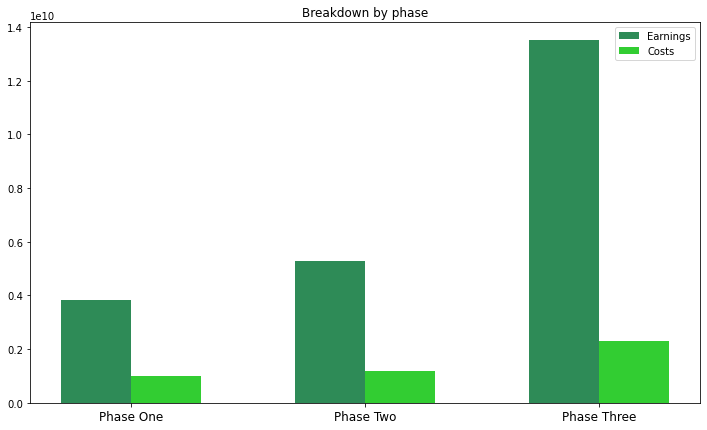

In [19]:
phases = ['Phase One', 'Phase Two', 'Phase Three']
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Breakdown by phase')
plt.bar(np.arange(len(phases))-width/2, earnings_by_phase, width, label='Earnings', color='seagreen')
plt.bar(np.arange(len(phases))+width/2, costs_by_phase, width, label='Costs', color='limegreen')
plt.xticks(range(len(phases)), phases, rotation='horizontal', size=12)

plt.legend()

plt.show()

<i>Phase Three</i> earned more than <i>Phase One</i> and <i>Phase Two</i> <b>combined</b> by over four billion dollars (13.5 billion vs. 9 billion).

### What is the total profit of the Infinity Saga?

In [20]:
print(f"Total profit: ${mcudata['Profit'].sum()}")

Total profit: $18108357060


### What is the total profit for each phase?

In [21]:
print(f"Phase One profit: ${mcudata.loc[(mcudata['Phase'] == 1)]['Profit'].sum()}")
print(f"Phase Two profit: ${mcudata.loc[(mcudata['Phase'] == 2)]['Profit'].sum()}")
print(f"Phase Three profit: ${mcudata.loc[(mcudata['Phase'] == 3)]['Profit'].sum()}")

Phase One profit: $2813212481
Phase Two profit: $4092911913
Phase Three profit: $11202232666


### What is the rate of return for the Infinity Saga?

In [22]:
print(f"Profit ratio: {round(mcudata['Earning'].sum()/mcudata['Budget'].sum(), 2)}")

Profit ratio: 5.04


### What is the rate of return for each phase?

In [23]:
print(f"Phase One: {round(earnings_by_phase[0]/costs_by_phase[0], 2)}")
print(f"Phase Two: {round(earnings_by_phase[1]/costs_by_phase[1], 2)}")
print(f"Phase Three: {round(earnings_by_phase[2]/costs_by_phase[2], 2)}")

Phase One: 3.81
Phase Two: 4.48
Phase Three: 5.86


With the overall rate of return at <b>5.04</b>, <i>Avengers: Endgame</i> really pushed that average up.

### What would be Phase Three's rate of return without Avengers: Endgame?

In [24]:
returnwithoutendgame = mcudata.loc[(mcudata['Phase'] == 3) & (mcudata['Film'] != 'Avengers: Endgame')]['Earning'].mean()/mcudata.loc[(mcudata['Phase'] == 3) & (mcudata['Film'] != 'Avengers: Endgame')]['Budget'].mean()
print(f"Phase Three without Avengers: Endgame: {round(returnwithoutendgame, 2)}")

Phase Three without Avengers: Endgame: 5.5


<b>Avengers: Endgame</b> pushed the <i>Phase Three</i> average up by 0.36.

### How much did each movie earn?

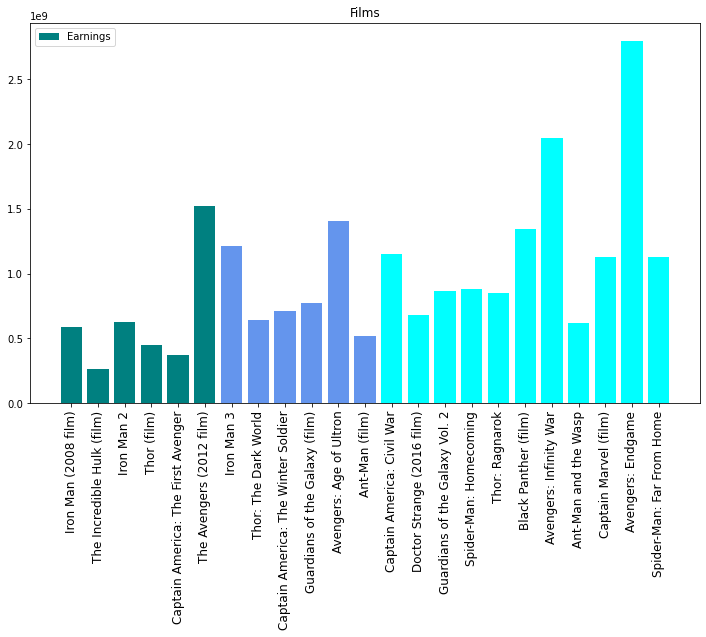

In [25]:
mcufilmlist = mcudata['Film'].to_list()
mcufilmearnings = mcudata['Earning'].to_list()
colors = ['teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan']

plt.figure(figsize=(12,7))

plt.title('Films')
plt.bar(np.arange(len(mcufilmlist)), mcufilmearnings, label='Earnings (in millions)', color=colors)
plt.xticks(range(len(mcufilmlist)), mcufilmlist, rotation='vertical', size=12)

plt.legend()

plt.show()

Both <i>Avengers: Infinity War</i> and <i>Avengers: Endgame</i> are <b>huge</b> outliers here, but the <i>Avengers</i> series overall are huge outliers. The movie closest to matching any of the <i>Avengers</i> films? <b>Black Panther</b>. After <b>Black Panther</b>, only four other films crossed the billion dollar mark.

### What was the highest grossing film?

In [26]:
mcudata.loc[(mcudata['Earning'] == max(mcudata['Earning']))]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
21,Avengers: Endgame,"April 26, 2019",2797800564,356000000,2441800564,7.85899,94,541,78,57,2019,181,3


### What was the lowest grossing film?

In [27]:
mcudata.loc[(mcudata['Earning'] == min(mcudata['Earning']))]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
1,The Incredible Hulk (film),"June 13, 2008",264770996,150000000,114770996,1.76514,67,238,61,38,2008,112,1


### How much did the Infinity Saga gross on average?

In [28]:
print(f"The Infinity Saga grossed ${round(mcudata['Earning'].mean(), 2)} on average.")

The Infinity Saga grossed $982059002.61 on average.


### How many films grossed more than the Infinity Saga average?

In [29]:
mcudata.loc[(mcudata['Earning'] > mcudata['Earning'].mean())].count()[0]

9

### Which films grossed more than the Infinity Saga average?

In [30]:
mcudata.loc[(mcudata['Earning'] > mcudata['Earning'].mean())]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
5,The Avengers (2012 film),"May 4, 2012",1518815515,220000000,1298815515,6.903707,91,362,69,43,2012,143,1
6,Iron Man 3,"May 3, 2013",1214811252,178000000,1036811252,6.824782,79,328,62,44,2013,131,2
10,Avengers: Age of Ultron,"May 1, 2015",1402805868,365000000,1037805868,3.843304,76,373,66,49,2015,141,2
12,Captain America: Civil War,"May 6, 2016",1153296293,230000000,923296293,5.014332,90,422,75,53,2016,147,3
17,Black Panther (film),"February 16, 2018",1347280161,200000000,1147280161,6.736401,96,523,88,55,2018,134,3
18,Avengers: Infinity War,"April 27, 2018",2048359754,325000000,1723359754,6.302645,85,480,68,54,2018,149,3
20,Captain Marvel (film),"March 8, 2019",1128275263,150000000,978275263,7.521835,79,537,64,56,2019,124,3
21,Avengers: Endgame,"April 26, 2019",2797800564,356000000,2441800564,7.858990,94,541,78,57,2019,181,3
22,Spider-Man: Far From Home,"July 2, 2019",1131927996,160000000,971927996,7.074550,90,448,69,55,2019,129,3


<b>Six</b> of the nine films that grossed more than the average came during <i>Phase Three<i>.

### What was each movie's budget?

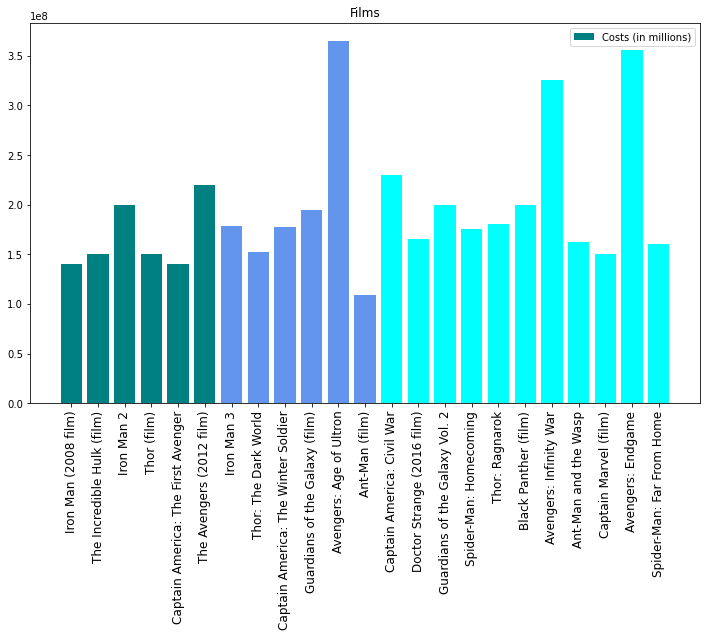

In [31]:
mcufilmlist = mcudata['Film'].to_list()
mcufilmcosts = mcudata['Budget'].to_list()
colors = ['teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan']

plt.figure(figsize=(12,7))

plt.title('Films')
plt.bar(np.arange(len(mcufilmlist)), mcufilmcosts, label='Costs (in millions)', color=colors)
plt.xticks(range(len(mcufilmlist)), mcufilmlist, rotation='vertical', size=12)

plt.legend()

plt.show()

It's not surprising that the <i>Avengers</i> films were the most expensive to produce. But what is surprising? <i>Captain America: Civil War</i> was more expensive than the original <i>Avengers</i> film in 2012.

### Which film was the most expensive to shoot?

In [32]:
mcudata.loc[(mcudata['Budget'] == max(mcudata['Budget']))]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
10,Avengers: Age of Ultron,"May 1, 2015",1402805868,365000000,1037805868,3.843304,76,373,66,49,2015,141,2


### Which film was the least expensive to shoot?

In [33]:
mcudata.loc[(mcudata['Budget'] == min(mcudata['Budget']))]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
11,Ant-Man (film),"July 17, 2015",519311965,109000000,410311965,4.76433,83,335,64,44,2015,117,2


### How much did the Infinity Saga cost on average?

In [34]:
print(f"The Infinity Saga cost ${round(mcudata['Budget'].mean(), 2)} on average.")

The Infinity Saga cost $194739130.43 on average.


### How many films cost more than the Infinity Saga average?

In [35]:
mcudata.loc[(mcudata['Budget'] > mcudata['Budget'].mean())].count()[0]

9

### Which films cost more than the Infinity Saga average?

In [36]:
mcudata.loc[(mcudata['Budget'] > mcudata['Budget'].mean())]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
2,Iron Man 2,"May 7, 2010",623933331,200000000,423933331,3.119667,72,304,57,40,2010,125,1
5,The Avengers (2012 film),"May 4, 2012",1518815515,220000000,1298815515,6.903707,91,362,69,43,2012,143,1
9,Guardians of the Galaxy (film),"August 1, 2014",772778185,195000000,577778185,3.962965,92,332,76,53,2014,122,2
10,Avengers: Age of Ultron,"May 1, 2015",1402805868,365000000,1037805868,3.843304,76,373,66,49,2015,141,2
12,Captain America: Civil War,"May 6, 2016",1153296293,230000000,923296293,5.014332,90,422,75,53,2016,147,3
14,Guardians of the Galaxy Vol. 2,"May 5, 2017",863756051,200000000,663756051,4.318780,85,421,67,48,2017,137,3
17,Black Panther (film),"February 16, 2018",1347280161,200000000,1147280161,6.736401,96,523,88,55,2018,134,3
18,Avengers: Infinity War,"April 27, 2018",2048359754,325000000,1723359754,6.302645,85,480,68,54,2018,149,3
21,Avengers: Endgame,"April 26, 2019",2797800564,356000000,2441800564,7.858990,94,541,78,57,2019,181,3


<b>Five</b> of the nine films that cost more than the average came during <i>Phase Three</i>.

### What was the profit for each film?

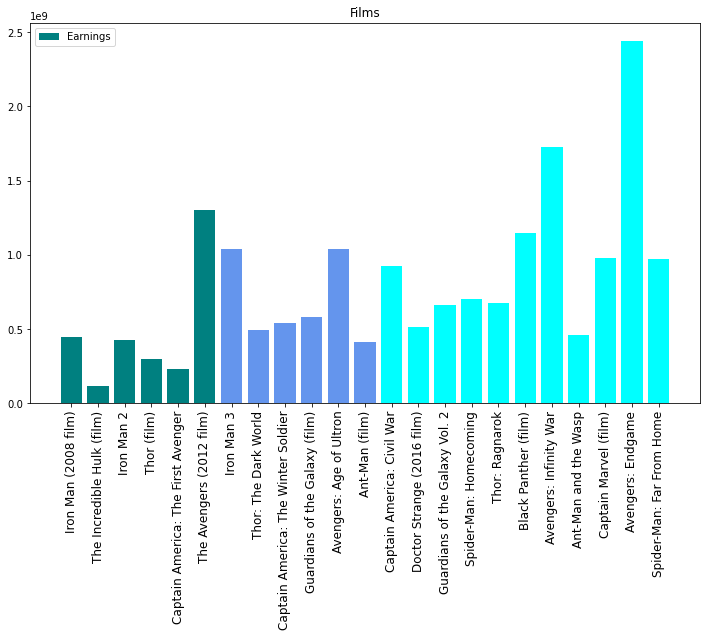

In [37]:
mcufilmlist = mcudata['Film'].to_list()
mcufilmprofits = mcudata['Profit'].to_list()
colors = ['teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan']

plt.figure(figsize=(12,7))

plt.title('Films')
plt.bar(np.arange(len(mcufilmlist)), mcufilmprofits, label='Profit', color=colors)
plt.xticks(range(len(mcufilmlist)), mcufilmlist, rotation='vertical', size=12)

plt.legend()

plt.show()

<i>Avengers: Age of Ultron</i> was the least profitable film of the <i>Avengers</i> series, and this is not surprising because neither the critics nor the audience were too fond of it.

### Which film was the most profitable?

In [38]:
mcudata.loc[(mcudata['Profit'] == max(mcudata['Profit']))]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
21,Avengers: Endgame,"April 26, 2019",2797800564,356000000,2441800564,7.85899,94,541,78,57,2019,181,3


### Which film was the least profitable?

In [39]:
mcudata.loc[(mcudata['Profit'] == min(mcudata['Profit']))]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
1,The Incredible Hulk (film),"June 13, 2008",264770996,150000000,114770996,1.76514,67,238,61,38,2008,112,1


### How much did the Infinity Saga profit on average?

In [40]:
print(f"The Infinity Saga profited ${round(mcudata['Profit'].mean(), 2)} on average.")

The Infinity Saga profited $787319872.17 on average.


### How many films profited more than the Infinity Saga average?

In [41]:
mcudata.loc[(mcudata['Profit'] > mcudata['Profit'].mean())].count()[0]

9

### Which films profited more than the Infinity Saga average?

In [42]:
mcudata.loc[(mcudata['Profit'] > mcudata['Profit'].mean())]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
5,The Avengers (2012 film),"May 4, 2012",1518815515,220000000,1298815515,6.903707,91,362,69,43,2012,143,1
6,Iron Man 3,"May 3, 2013",1214811252,178000000,1036811252,6.824782,79,328,62,44,2013,131,2
10,Avengers: Age of Ultron,"May 1, 2015",1402805868,365000000,1037805868,3.843304,76,373,66,49,2015,141,2
12,Captain America: Civil War,"May 6, 2016",1153296293,230000000,923296293,5.014332,90,422,75,53,2016,147,3
17,Black Panther (film),"February 16, 2018",1347280161,200000000,1147280161,6.736401,96,523,88,55,2018,134,3
18,Avengers: Infinity War,"April 27, 2018",2048359754,325000000,1723359754,6.302645,85,480,68,54,2018,149,3
20,Captain Marvel (film),"March 8, 2019",1128275263,150000000,978275263,7.521835,79,537,64,56,2019,124,3
21,Avengers: Endgame,"April 26, 2019",2797800564,356000000,2441800564,7.858990,94,541,78,57,2019,181,3
22,Spider-Man: Far From Home,"July 2, 2019",1131927996,160000000,971927996,7.074550,90,448,69,55,2019,129,3


<b>Six</b> of the nine films that profited more than the average came during <i>Phase Three</i>.

### What was the rate of return for each film?

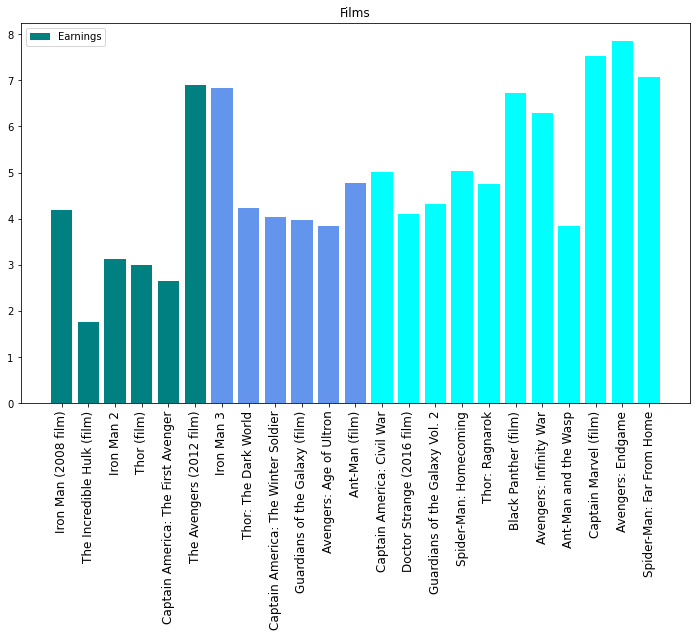

In [43]:
mcufilmlist = mcudata['Film'].to_list()
mcufilmreturns = mcudata['Return'].to_list()
colors = ['teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan']

plt.figure(figsize=(12,7))

plt.title('Films')
plt.bar(np.arange(len(mcufilmlist)), mcufilmreturns, label='Rate of return', color=colors)
plt.xticks(range(len(mcufilmlist)), mcufilmlist, rotation='vertical', size=12)

plt.legend()

plt.show()

<b>The Avengers</b>, <b>Iron Man 3</b>, <b>Black Panther</b>, <b>Avengers: Infinity War</b>, <b>Captain Marvel</b>, <b>Avengers: Endgame</b>, and <b>Spider-Man: Far From Home</b> had the biggest rates of return out of all <i>Infinity Saga</i> films. Every single film had a rate of return over <b>six</b> times their budget.

### Which film had the highest rate of return?

In [44]:
mcudata.loc[(mcudata['Return'] == max(mcudata['Return']))]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
21,Avengers: Endgame,"April 26, 2019",2797800564,356000000,2441800564,7.85899,94,541,78,57,2019,181,3


### Which film had the lowest rate of return?

In [45]:
mcudata.loc[(mcudata['Return'] == min(mcudata['Return']))]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
1,The Incredible Hulk (film),"June 13, 2008",264770996,150000000,114770996,1.76514,67,238,61,38,2008,112,1


### What was the Infinity Saga's average rate of return?

In [46]:
print(f"The Infinity Saga's average rate of return was {round(mcudata['Return'].mean(), 2)}.")

The Infinity Saga's average rate of return was 4.86.


### How many films had a rate of return above the Infinity Saga average?

In [47]:
mcudata.loc[(mcudata['Return'] > mcudata['Return'].mean())].count()[0]

9

### Which films had a rate of return above the Infinity Saga average?

In [48]:
mcudata.loc[(mcudata['Return'] > mcudata['Return'].mean())]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
5,The Avengers (2012 film),"May 4, 2012",1518815515,220000000,1298815515,6.903707,91,362,69,43,2012,143,1
6,Iron Man 3,"May 3, 2013",1214811252,178000000,1036811252,6.824782,79,328,62,44,2013,131,2
12,Captain America: Civil War,"May 6, 2016",1153296293,230000000,923296293,5.014332,90,422,75,53,2016,147,3
15,Spider-Man: Homecoming,"July 7, 2017",880166924,175000000,705166924,5.029525,92,393,73,51,2017,133,3
17,Black Panther (film),"February 16, 2018",1347280161,200000000,1147280161,6.736401,96,523,88,55,2018,134,3
18,Avengers: Infinity War,"April 27, 2018",2048359754,325000000,1723359754,6.302645,85,480,68,54,2018,149,3
20,Captain Marvel (film),"March 8, 2019",1128275263,150000000,978275263,7.521835,79,537,64,56,2019,124,3
21,Avengers: Endgame,"April 26, 2019",2797800564,356000000,2441800564,7.858990,94,541,78,57,2019,181,3
22,Spider-Man: Far From Home,"July 2, 2019",1131927996,160000000,971927996,7.074550,90,448,69,55,2019,129,3


<b>Seven</b> of the nine films that had a higher rate of return than the average came during <i>Phase Three</i>.

### What was the runtime for each film?

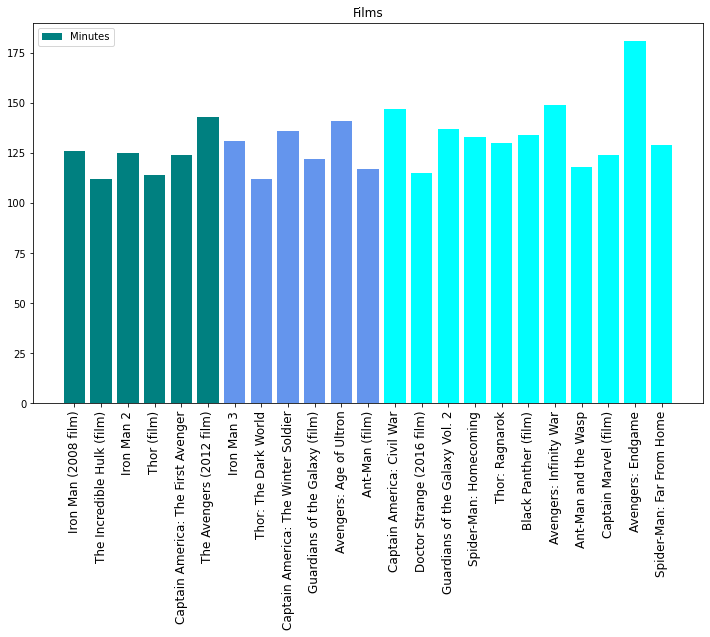

In [49]:
mcufilmlist = mcudata['Film'].to_list()
mcufilmruntime = mcudata['Runtime'].to_list()
colors = ['teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan']

plt.figure(figsize=(12,7))

plt.title('Films')
plt.bar(np.arange(len(mcufilmlist)), mcufilmruntime, label='Minutes', color=colors)
plt.xticks(range(len(mcufilmlist)), mcufilmlist, rotation='vertical', size=12)

plt.legend()

plt.show()

Most films had a runtime of slightly above two hours, but <i>Avengers: Endgame</i> surpassed three hours.

### Which film had the highest runtime?

In [50]:
mcudata.loc[(mcudata['Runtime'] == max(mcudata['Runtime']))]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
21,Avengers: Endgame,"April 26, 2019",2797800564,356000000,2441800564,7.85899,94,541,78,57,2019,181,3


### Which film had the lowest runtime?

In [51]:
mcudata.loc[(mcudata['Runtime'] == min(mcudata['Runtime']))]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
1,The Incredible Hulk (film),"June 13, 2008",264770996,150000000,114770996,1.765140,67,238,61,38,2008,112,1
7,Thor: The Dark World,"November 8, 2013",644783140,152000000,492783140,4.241994,66,284,54,44,2013,112,2


### What was the Infinity Saga's average runtime?

In [52]:
print(f"The Infinity Saga's average rate of return was {round(mcudata['Runtime'].mean(), 2)} minutes.")

The Infinity Saga's average rate of return was 130.43 minutes.


### How many films had a runtime above the Infinity Saga average?

In [53]:
mcudata.loc[(mcudata['Runtime'] > mcudata['Runtime'].mean())].count()[0]

10

### Which films ran above the average runtime?

In [54]:
mcudata.loc[(mcudata['Runtime'] > mcudata['Runtime'].mean())]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
5,The Avengers (2012 film),"May 4, 2012",1518815515,220000000,1298815515,6.903707,91,362,69,43,2012,143,1
6,Iron Man 3,"May 3, 2013",1214811252,178000000,1036811252,6.824782,79,328,62,44,2013,131,2
8,Captain America: The Winter Soldier,"April 4, 2014",714421503,177000000,537421503,4.036280,90,306,70,48,2014,136,2
10,Avengers: Age of Ultron,"May 1, 2015",1402805868,365000000,1037805868,3.843304,76,373,66,49,2015,141,2
12,Captain America: Civil War,"May 6, 2016",1153296293,230000000,923296293,5.014332,90,422,75,53,2016,147,3
14,Guardians of the Galaxy Vol. 2,"May 5, 2017",863756051,200000000,663756051,4.318780,85,421,67,48,2017,137,3
15,Spider-Man: Homecoming,"July 7, 2017",880166924,175000000,705166924,5.029525,92,393,73,51,2017,133,3
17,Black Panther (film),"February 16, 2018",1347280161,200000000,1147280161,6.736401,96,523,88,55,2018,134,3
18,Avengers: Infinity War,"April 27, 2018",2048359754,325000000,1723359754,6.302645,85,480,68,54,2018,149,3
21,Avengers: Endgame,"April 26, 2019",2797800564,356000000,2441800564,7.858990,94,541,78,57,2019,181,3


Only the original <i>Avengers</i>, <i>Spider-Man: Homecoming</i>, and <i>Black Panther</i> ran above average runtime and were not sequels of another film.

### What was the average runtime for each phase?

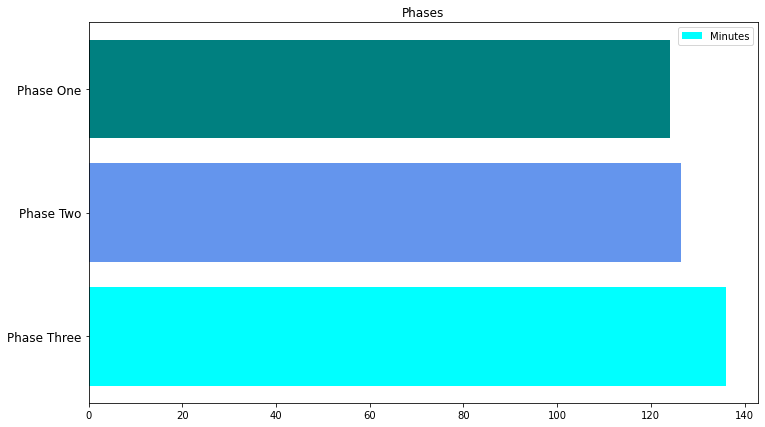

In [55]:
phaseruntime = [mcudata.loc[(mcudata['Phase'] == i)]['Runtime'].mean() for i in range(1,4)]

phases = ['Phase One', 'Phase Two', 'Phase Three']
colors = ['teal', 'cornflowerblue', 'cyan']

plt.figure(figsize=(12,7))

plt.title('Phases')
plt.barh(np.arange(len(phaseruntime)), phaseruntime[::-1], label='Minutes', color=colors[::-1])
plt.yticks(range(len(phaseruntime)-1,-1,-1), phases, rotation='horizontal', size=12)

plt.legend()

plt.show()

In [56]:
print(f"Phase One: {mcudata.loc[(mcudata['Phase'] == 1)]['Runtime'].mean()} minutes.")
print(f"Phase Two: {mcudata.loc[(mcudata['Phase'] == 2)]['Runtime'].mean()} minutes.")
print(f"Phase Three: {mcudata.loc[(mcudata['Phase'] == 3)]['Runtime'].mean()} minutes.")

Phase One: 124.0 minutes.
Phase Two: 126.5 minutes.
Phase Three: 136.0909090909091 minutes.


The runtime between <i>Phase One</i> and <i>Phase Two</i> was almost equivalent, but <i>Phase Three</i> pushed it up 10 by minutes.

### How much did Avengers: Endgame increase the average runtime?

In [112]:
mcuavgruntime = mcudata.loc[(mcudata['Phase'] == 3) & (mcudata['Film'] != 'Avengers: Endgame')]['Runtime'].mean()
print(f"Phase Three's average runtime without Avengers: Endgame is {round(mcuavgruntime, 2)} minutes.")

Phase Three's average runtime without Avengers: Endgame is 131.6 minutes.


By <b>4.5</b> minutes, but <i>Phase Three</i> just had films with longer runtime overall (i.e. <i>Captain America: Civil War</i>, <i>Avengers: Infinity War</i>).

### How much was each film earning per minute?

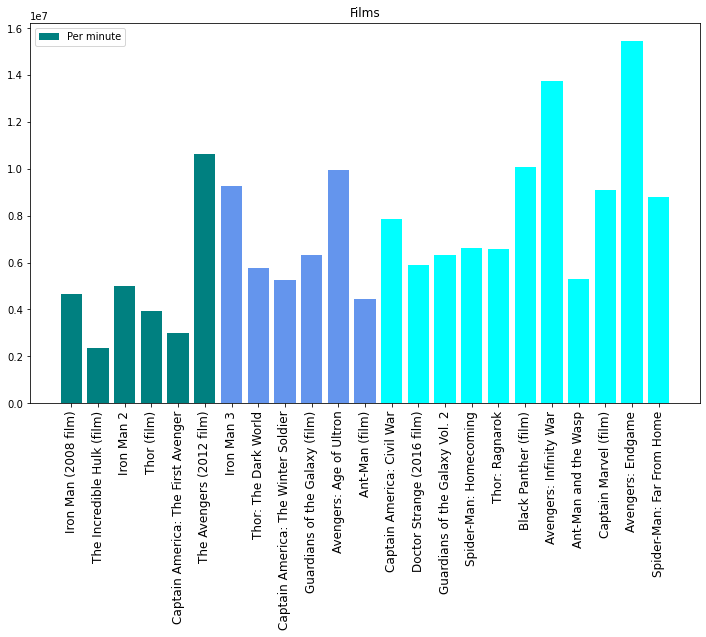

In [58]:
mcufilmlist = mcudata['Film'].to_list()
mcufilmperminute = [mcufilmearnings[i]/mcufilmruntime[i] for i in range(len(mcufilmearnings))]
colors = ['teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan']

plt.figure(figsize=(12,7))

plt.title('Films')
plt.bar(np.arange(len(mcufilmlist)), mcufilmperminute, label='Per minute', color=colors)
plt.xticks(range(len(mcufilmlist)), mcufilmlist, rotation='vertical', size=12)

plt.legend()

plt.show()

Not surprisingly, the <i>Avengers</i> series and <i>Black Panther</i> earned the most per minute. <i>Avengers: Endgame</i> was earning over <b>15 million</b> dollars a minute.

### Which film was earning the most per minute?

In [59]:
mcudata.loc[(mcudata['Earning']/mcudata['Runtime'] == max(mcudata['Earning']/mcudata['Runtime']))]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
21,Avengers: Endgame,"April 26, 2019",2797800564,356000000,2441800564,7.85899,94,541,78,57,2019,181,3


### Which film was earning the least per minute?

In [60]:
mcudata.loc[(mcudata['Earning']/mcudata['Runtime'] == min(mcudata['Earning']/mcudata['Runtime']))]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
1,The Incredible Hulk (film),"June 13, 2008",264770996,150000000,114770996,1.76514,67,238,61,38,2008,112,1


### How much was the Infinity Saga averaging per minute?

In [61]:
print(f"The Infinity Saga was averaging ${round(sum(mcufilmearnings)/sum(mcufilmruntime), 2)} per minute.")

The Infinity Saga was averaging $7529119.02 per minute.


### How many films were averaging more per minute?

In [62]:
mcudata.loc[(mcudata['Earning']/mcudata['Runtime']) > sum(mcufilmearnings)/sum(mcufilmruntime)].count()[0]

9

### Which films were averaging more per minute?

In [63]:
mcudata.loc[(mcudata['Earning']/mcudata['Runtime']) > sum(mcufilmearnings)/sum(mcufilmruntime)]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
5,The Avengers (2012 film),"May 4, 2012",1518815515,220000000,1298815515,6.903707,91,362,69,43,2012,143,1
6,Iron Man 3,"May 3, 2013",1214811252,178000000,1036811252,6.824782,79,328,62,44,2013,131,2
10,Avengers: Age of Ultron,"May 1, 2015",1402805868,365000000,1037805868,3.843304,76,373,66,49,2015,141,2
12,Captain America: Civil War,"May 6, 2016",1153296293,230000000,923296293,5.014332,90,422,75,53,2016,147,3
17,Black Panther (film),"February 16, 2018",1347280161,200000000,1147280161,6.736401,96,523,88,55,2018,134,3
18,Avengers: Infinity War,"April 27, 2018",2048359754,325000000,1723359754,6.302645,85,480,68,54,2018,149,3
20,Captain Marvel (film),"March 8, 2019",1128275263,150000000,978275263,7.521835,79,537,64,56,2019,124,3
21,Avengers: Endgame,"April 26, 2019",2797800564,356000000,2441800564,7.858990,94,541,78,57,2019,181,3
22,Spider-Man: Far From Home,"July 2, 2019",1131927996,160000000,971927996,7.074550,90,448,69,55,2019,129,3


<b>Six</b> of the nine films that earned high than the average per minute came during <i>Phase Three</i>.

### How much was each phase averaging per minute?

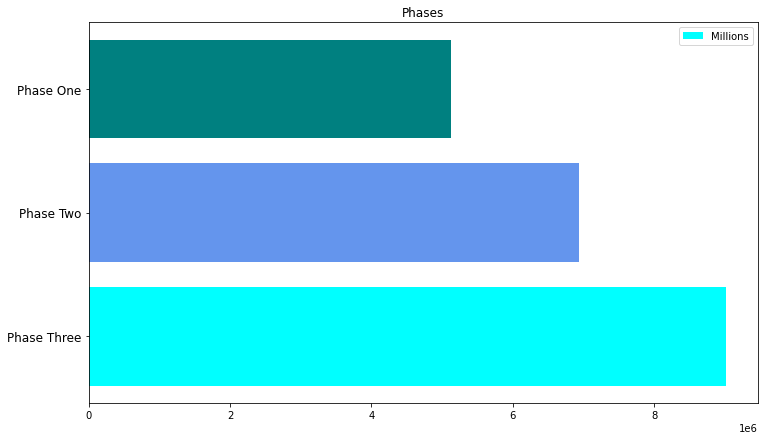

In [64]:
phaseavgperminute = [mcudata.loc[(mcudata['Phase'] == i)]['Earning'].mean()/mcudata.loc[(mcudata['Phase'] == i)]['Runtime'].mean() for i in range(1,4)]

phases = ['Phase One', 'Phase Two', 'Phase Three']
colors = ['teal', 'cornflowerblue', 'cyan']

plt.figure(figsize=(12,7))

plt.title('Phases')
plt.barh(np.arange(len(phaseavgperminute)), phaseavgperminute[::-1], label='Millions', color=colors[::-1])
plt.yticks(range(len(phaseavgperminute)-1,-1,-1), phases, rotation='horizontal', size=12)

plt.legend()

plt.show()

In [65]:
print(f"Phase One: ${mcudata.loc[(mcudata['Phase'] == 1)]['Earning'].mean()/mcudata.loc[(mcudata['Phase'] == 1)]['Runtime'].mean()}")
print(f"Phase Two: ${mcudata.loc[(mcudata['Phase'] == 2)]['Earning'].mean()/mcudata.loc[(mcudata['Phase'] == 1)]['Runtime'].mean()}")
print(f"Phase Three: ${mcudata.loc[(mcudata['Phase'] == 3)]['Earning'].mean()/mcudata.loc[(mcudata['Phase'] == 1)]['Runtime'].mean()}")

Phase One: $5125285.5927419355
Phase Two: $7081870.850806451
Phase Three: $9901196.969208213


Nearly <b>10 million</b> dollars a minute for <i>Phase Three</i>! A bit unsurprising given there were two <i>Avengers</i> films in this phase.

### How much did Avengers: Endgame increase the average per minute?

In [113]:
phaseavgwithoutendgame = mcudata.loc[(mcudata['Phase'] == 3) & (mcudata['Film'] != 'Avengers: Endgame')]['Earning'].mean()/mcudata.loc[(mcudata['Phase'] == 3)]['Runtime'].mean()
print(f"Phase Three's average per minute without Avengers: Endgame: ${round(phaseavgwithoutendgame, 2)}")

Phase Three's average per minute without Avengers: Endgame: $7867852.58


By <b>2.1 million</b> dollars. That's <i>Avengers: Endgame</i>'s mark.

### How did Rotten Tomatoes rate each film?

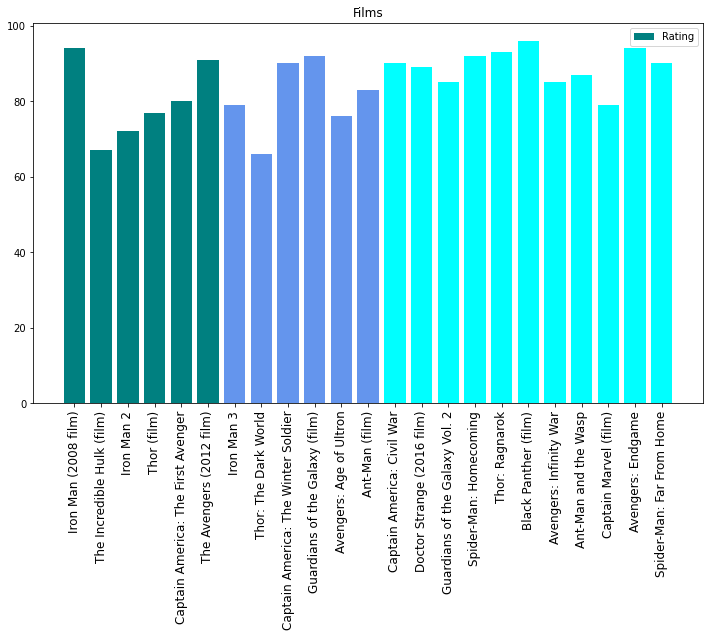

In [67]:
mcufilmlist = mcudata['Film'].to_list()
mcufilmrtratings = mcudata['Rotten Tomatoes Ratings'].to_list()
colors = ['teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan']

plt.figure(figsize=(12,7))

plt.title('Films')
plt.bar(np.arange(len(mcufilmlist)), mcufilmrtratings, label='Rating', color=colors)
plt.xticks(range(len(mcufilmlist)), mcufilmlist, rotation='vertical', size=12)

plt.legend()

plt.show()

<i>Rotten Tomatoes</i>' ranking system is simple: It is an aggregate of positive and negative reviews. So if every film was rated above 60%, that means every film has at least 60% positive reviews overall. This does not take into consideration of how positive (or how negative) the film is rated by critics.

With that said, despite <i>The Incredible Hulk</i> appearing to be a recurring lowlight, <i>Thor: The Dark World</i> is rated even lower.

### What is the breakdown of films by Rotten Tomatoes' ratings?

In [68]:
above_60_rt = mcudata.loc[(mcudata['Rotten Tomatoes Ratings'] < 70)].count()[0]
above_70_rt = mcudata.loc[(mcudata['Rotten Tomatoes Ratings'] >= 70) & (mcudata['Rotten Tomatoes Ratings'] <= 79)].count()[0]
above_80_rt = mcudata.loc[(mcudata['Rotten Tomatoes Ratings'] >= 80) & (mcudata['Rotten Tomatoes Ratings'] <= 89)].count()[0]
above_90_rt = mcudata.loc[(mcudata['Rotten Tomatoes Ratings'] >= 90)].count()[0]

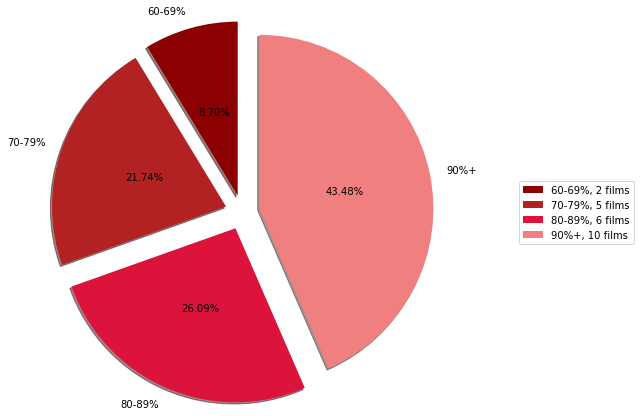

In [69]:
labels = ['60-69%', '70-79%', '80-89%', '90%+']
sizes = [above_60_rt, above_70_rt, above_80_rt, above_90_rt]
color_set = ['darkred', 'firebrick', 'crimson', 'lightcoral']

explode = ([0.2, 0.2, 0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f films' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.75, 0.5), loc='center left')

plt.show()

With <b>10</b> out of 23 films landing above 90%, scoring above 90% is almost just as likely as scoring anywhere below 90%.

### What was Rotten Tomatoes' highest rated film?

In [70]:
mcudata.loc[(mcudata['Rotten Tomatoes Ratings'] == max(mcudata['Rotten Tomatoes Ratings']))]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
17,Black Panther (film),"February 16, 2018",1347280161,200000000,1147280161,6.736401,96,523,88,55,2018,134,3


### What was Rotten Tomatoes' lowest rated film?

In [71]:
mcudata.loc[(mcudata['Rotten Tomatoes Ratings'] == min(mcudata['Rotten Tomatoes Ratings']))]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
7,Thor: The Dark World,"November 8, 2013",644783140,152000000,492783140,4.241994,66,284,54,44,2013,112,2


### What was Rotten Tomatoes' average rating for the entire Infinity Saga?

In [72]:
print(f"The Infinity Saga's average Rotten Tomatoes rating was {round(mcudata['Rotten Tomatoes Ratings'].mean(), 2)}%.")

The Infinity Saga's average Rotten Tomatoes rating is 84.65%.


### How many films were rated above the Rotten Tomatoes average?

In [73]:
mcudata.loc[(mcudata['Rotten Tomatoes Ratings'] > mcudata['Rotten Tomatoes Ratings'].mean())].count()[0]

14

### Which films were rated above the Rotten Tomatoes average?

In [74]:
mcudata.loc[(mcudata['Rotten Tomatoes Ratings'] > mcudata['Rotten Tomatoes Ratings'].mean())]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
0,Iron Man (2008 film),"May 2, 2008",585796247,140000000,445796247,4.184259,94,281,79,38,2008,126,1
5,The Avengers (2012 film),"May 4, 2012",1518815515,220000000,1298815515,6.903707,91,362,69,43,2012,143,1
8,Captain America: The Winter Soldier,"April 4, 2014",714421503,177000000,537421503,4.036280,90,306,70,48,2014,136,2
9,Guardians of the Galaxy (film),"August 1, 2014",772778185,195000000,577778185,3.962965,92,332,76,53,2014,122,2
12,Captain America: Civil War,"May 6, 2016",1153296293,230000000,923296293,5.014332,90,422,75,53,2016,147,3
13,Doctor Strange (2016 film),"November 4, 2016",677718395,165000000,512718395,4.107384,89,382,72,49,2016,115,3
14,Guardians of the Galaxy Vol. 2,"May 5, 2017",863756051,200000000,663756051,4.318780,85,421,67,48,2017,137,3
15,Spider-Man: Homecoming,"July 7, 2017",880166924,175000000,705166924,5.029525,92,393,73,51,2017,133,3
16,Thor: Ragnarok,"November 3, 2017",853977126,180000000,673977126,4.744317,93,434,74,51,2017,130,3
17,Black Panther (film),"February 16, 2018",1347280161,200000000,1147280161,6.736401,96,523,88,55,2018,134,3


<b>14</b>! 14 out of 23 films have a rating above 84,65%!

### How many Rotten Tomatoes reviews are there for each film?

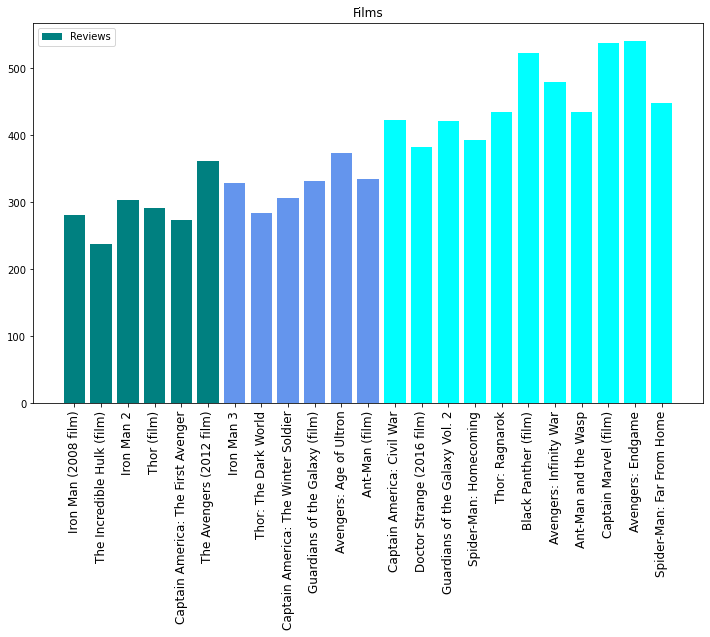

In [75]:
mcufilmlist = mcudata['Film'].to_list()
mcufilmrtratings = mcudata['Rotten Tomatoes Reviews'].to_list()
colors = ['teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan']

plt.figure(figsize=(12,7))

plt.title('Films')
plt.bar(np.arange(len(mcufilmlist)), mcufilmrtratings, label='Reviews', color=colors)
plt.xticks(range(len(mcufilmlist)), mcufilmlist, rotation='vertical', size=12)

plt.legend()

plt.show()

As more and more films were released, so followed the reviews. The <i>Avengers</i> films always topped the total number of reviews per their respective phases, but <i>Black Panther</i> was able to break into that club. In fact it is one of only three films with over 500 reviews, with the other two being <i>Avengers: Infinity War</i> and <i>Avengers: Endgame</i>.

### What is the breakdown of films by Rotten Tomatoes' reviews?

In [76]:
above_200_rt = mcudata.loc[(mcudata['Rotten Tomatoes Reviews'] < 300)].count()[0]
above_300_rt = mcudata.loc[(mcudata['Rotten Tomatoes Reviews'] >= 300) & (mcudata['Rotten Tomatoes Reviews'] <= 399)].count()[0]
above_400_rt = mcudata.loc[(mcudata['Rotten Tomatoes Reviews'] >= 400) & (mcudata['Rotten Tomatoes Reviews'] <= 499)].count()[0]
above_500_rt = mcudata.loc[(mcudata['Rotten Tomatoes Reviews'] >= 500)].count()[0]

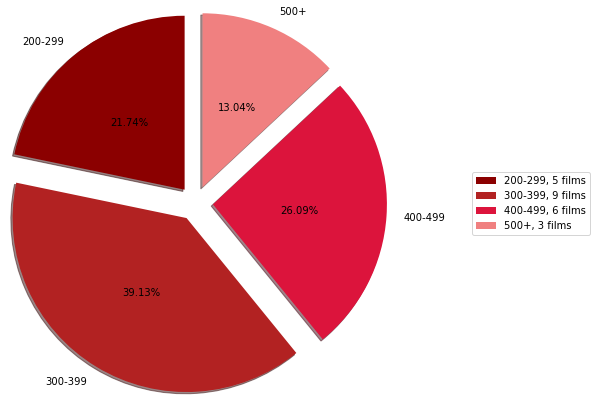

In [77]:
labels = ['200-299', '300-399', '400-499', '500+']
sizes = [above_200_rt, above_300_rt, above_400_rt, above_500_rt]
color_set = ['darkred', 'firebrick', 'crimson', 'lightcoral']

explode = ([0.2, 0.2, 0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f films' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.75, 0.5), loc='center left')

plt.show()

Nearly 40% of all films had between 300 to 400 reviews.

### What was Rotten Tomatoes' most reviewed film?

In [78]:
mcudata.loc[(mcudata['Rotten Tomatoes Reviews'] == max(mcudata['Rotten Tomatoes Reviews']))]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
21,Avengers: Endgame,"April 26, 2019",2797800564,356000000,2441800564,7.85899,94,541,78,57,2019,181,3


### What was Rotten Tomatoes' least reviewed film?

In [79]:
mcudata.loc[(mcudata['Rotten Tomatoes Reviews'] == min(mcudata['Rotten Tomatoes Reviews']))]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
1,The Incredible Hulk (film),"June 13, 2008",264770996,150000000,114770996,1.76514,67,238,61,38,2008,112,1


### What was Rotten Tomatoes' average review count for the entire Infinity Saga?

In [80]:
print(f"The Infinity Saga's average number of Rotten Tomatoes reviews is {round(mcudata['Rotten Tomatoes Reviews'].mean())}.")

The Infinity Saga's average number of Rotten Tomatoes reviews is 379.0.


### How many films had more reviews than the Rotten Tomatoes average?

In [81]:
mcudata.loc[(mcudata['Rotten Tomatoes Reviews'] > mcudata['Rotten Tomatoes Reviews'].mean())].count()[0]

11

### Which films had more reviews than the Rotten Tomatoes average?

In [82]:
mcudata.loc[(mcudata['Rotten Tomatoes Reviews'] > mcudata['Rotten Tomatoes Reviews'].mean())]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
12,Captain America: Civil War,"May 6, 2016",1153296293,230000000,923296293,5.014332,90,422,75,53,2016,147,3
13,Doctor Strange (2016 film),"November 4, 2016",677718395,165000000,512718395,4.107384,89,382,72,49,2016,115,3
14,Guardians of the Galaxy Vol. 2,"May 5, 2017",863756051,200000000,663756051,4.318780,85,421,67,48,2017,137,3
15,Spider-Man: Homecoming,"July 7, 2017",880166924,175000000,705166924,5.029525,92,393,73,51,2017,133,3
16,Thor: Ragnarok,"November 3, 2017",853977126,180000000,673977126,4.744317,93,434,74,51,2017,130,3
17,Black Panther (film),"February 16, 2018",1347280161,200000000,1147280161,6.736401,96,523,88,55,2018,134,3
18,Avengers: Infinity War,"April 27, 2018",2048359754,325000000,1723359754,6.302645,85,480,68,54,2018,149,3
19,Ant-Man and the Wasp,"July 6, 2018",622674139,162000000,460674139,3.843668,87,435,70,56,2018,118,3
20,Captain Marvel (film),"March 8, 2019",1128275263,150000000,978275263,7.521835,79,537,64,56,2019,124,3
21,Avengers: Endgame,"April 26, 2019",2797800564,356000000,2441800564,7.858990,94,541,78,57,2019,181,3


That's the <b>entirety</b> of <i>Phase Three</i>! That speaks to just how many more critics chimed in during <i>Phase Three</i> compared to <i>Phase One</i> and <i>Phase Two</i>.

### How did Metacritic rate each film?

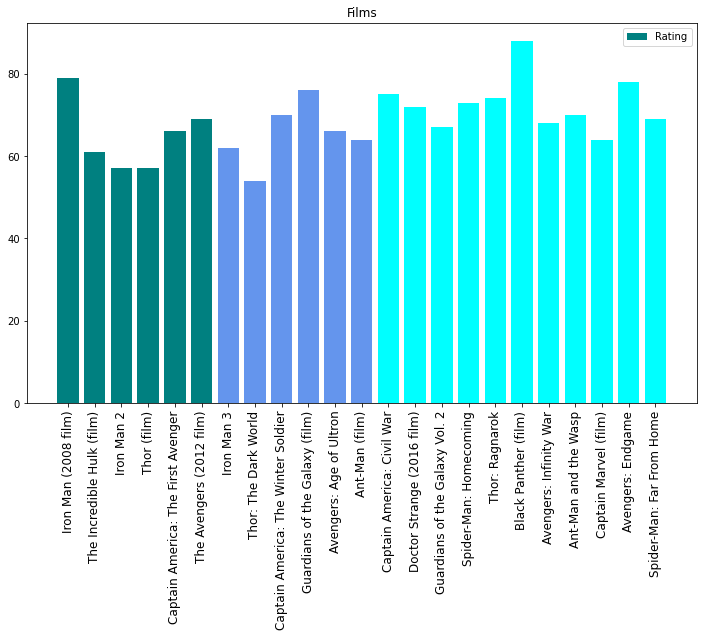

In [83]:
mcufilmlist = mcudata['Film'].to_list()
mcufilmmcratings = mcudata['Metacritic Ratings'].to_list()
colors = ['teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan']

plt.figure(figsize=(12,7))

plt.title('Films')
plt.bar(np.arange(len(mcufilmlist)), mcufilmmcratings, label='Rating', color=colors)
plt.xticks(range(len(mcufilmlist)), mcufilmlist, rotation='vertical', size=12)

plt.legend()

plt.show()

<i>Black Panther</i> is still the highest rated film by the Metacritic rating system, and no other film comes close to it. <i>Iron Man</i>, <i>Guardians of the Galaxy</i>, <i>Captain America: Civil War</i> and <i>Avengers: Endgame</i> are rated a level below <i>Black Panther</i>, and every other film is rated a level below them.

### What is the breakdown of films by Metacritic's ratings?

In [84]:
above_50_mc = mcudata.loc[(mcudata['Metacritic Ratings'] < 60)].count()[0]
above_60_mc = mcudata.loc[(mcudata['Metacritic Ratings'] >= 60) & (mcudata['Metacritic Ratings'] <= 69)].count()[0]
above_70_mc = mcudata.loc[(mcudata['Metacritic Ratings'] >= 70) & (mcudata['Metacritic Ratings'] <= 79)].count()[0]
above_80_mc = mcudata.loc[(mcudata['Metacritic Ratings'] >= 80)].count()[0]

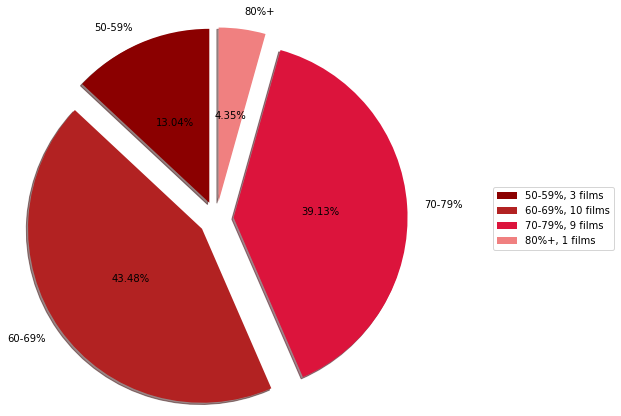

In [85]:
labels = ['50-59%', '60-69%', '70-79%', '80%+']
sizes = [above_50_mc, above_60_mc, above_70_mc, above_80_mc]
color_set = ['darkred', 'firebrick', 'crimson', 'lightcoral']

explode = ([0.2, 0.2, 0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f films' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.75, 0.5), loc='center left')

plt.show()

Only one film had a rating above 80%, and almost the entirety of the saga was rated between 60%-79%. Three films were below 60%.

### What was Metacritic's highest rated film?

In [86]:
mcudata.loc[(mcudata['Metacritic Ratings'] == max(mcudata['Metacritic Ratings']))]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
17,Black Panther (film),"February 16, 2018",1347280161,200000000,1147280161,6.736401,96,523,88,55,2018,134,3


### What was Metacritic's lowest rated film?

In [87]:
mcudata.loc[(mcudata['Metacritic Ratings'] == min(mcudata['Metacritic Ratings']))]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
7,Thor: The Dark World,"November 8, 2013",644783140,152000000,492783140,4.241994,66,284,54,44,2013,112,2


### What was Metacritic's average rating for the entire Infinity Saga?

In [88]:
print(f"The Infinity Saga's average Metacritic rating was {round(mcudata['Metacritic Ratings'].mean(), 2)}%.")

The Infinity Saga's average Metacritic rating is 68.65%.


### How many films were rated above the Metacritic average?

In [89]:
mcudata.loc[(mcudata['Metacritic Ratings'] > mcudata['Metacritic Ratings'].mean())].count()[0]

12

### Which films were rated above the Metacritic average?

In [90]:
mcudata.loc[(mcudata['Metacritic Ratings'] > mcudata['Metacritic Ratings'].mean())]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
0,Iron Man (2008 film),"May 2, 2008",585796247,140000000,445796247,4.184259,94,281,79,38,2008,126,1
5,The Avengers (2012 film),"May 4, 2012",1518815515,220000000,1298815515,6.903707,91,362,69,43,2012,143,1
8,Captain America: The Winter Soldier,"April 4, 2014",714421503,177000000,537421503,4.036280,90,306,70,48,2014,136,2
9,Guardians of the Galaxy (film),"August 1, 2014",772778185,195000000,577778185,3.962965,92,332,76,53,2014,122,2
12,Captain America: Civil War,"May 6, 2016",1153296293,230000000,923296293,5.014332,90,422,75,53,2016,147,3
13,Doctor Strange (2016 film),"November 4, 2016",677718395,165000000,512718395,4.107384,89,382,72,49,2016,115,3
15,Spider-Man: Homecoming,"July 7, 2017",880166924,175000000,705166924,5.029525,92,393,73,51,2017,133,3
16,Thor: Ragnarok,"November 3, 2017",853977126,180000000,673977126,4.744317,93,434,74,51,2017,130,3
17,Black Panther (film),"February 16, 2018",1347280161,200000000,1147280161,6.736401,96,523,88,55,2018,134,3
19,Ant-Man and the Wasp,"July 6, 2018",622674139,162000000,460674139,3.843668,87,435,70,56,2018,118,3


Only three films from <i>Phase Three</i> do not make it onto the list. They are:
- <i>Guardians of the Galaxy Vol. 2</i>
- <i>Captain Marvel</i>
- <i>Avengers: Infinity War</i>

### How many Metacritic reviews are there for each film?

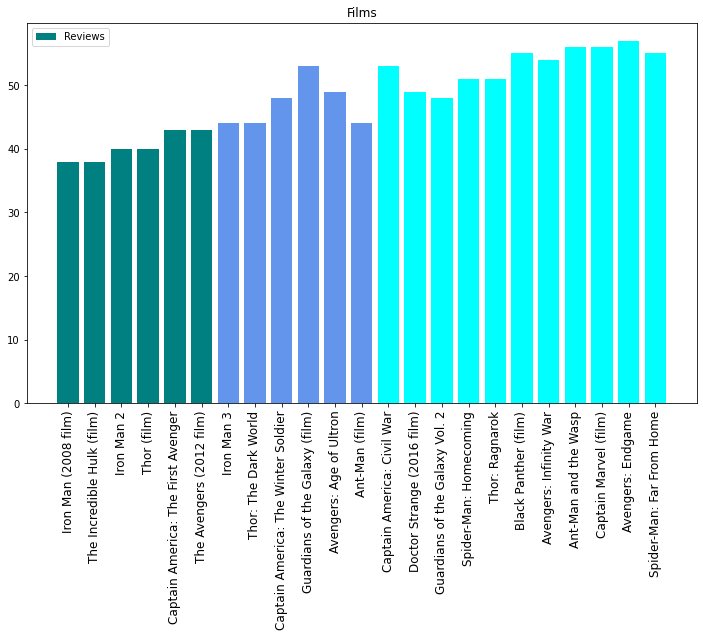

In [91]:
mcufilmlist = mcudata['Film'].to_list()
mcufilmrtratings = mcudata['Metacritic Reviews'].to_list()
colors = ['teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan']

plt.figure(figsize=(12,7))

plt.title('Films')
plt.bar(np.arange(len(mcufilmlist)), mcufilmrtratings, label='Reviews', color=colors)
plt.xticks(range(len(mcufilmlist)), mcufilmlist, rotation='vertical', size=12)

plt.legend()

plt.show()

Before <i>Phase Three</i>, the <i>Guardians of the Galaxy Vol. 2</i> had the most amount of reviews at 50, beating out both the <i>Avengers</i> films. That record would stay until the arrival of <i>Black Panther</i>, and every subsequent movie would have more reviews.

### What is the breakdown of films by Metacritic reviews?

In [92]:
above_30_mc = mcudata.loc[(mcudata['Metacritic Reviews'] < 40)].count()[0]
above_40_mc = mcudata.loc[(mcudata['Metacritic Reviews'] >= 40) & (mcudata['Metacritic Reviews'] <= 49)].count()[0]
above_50_mc = mcudata.loc[(mcudata['Metacritic Reviews'] >= 50)].count()[0]

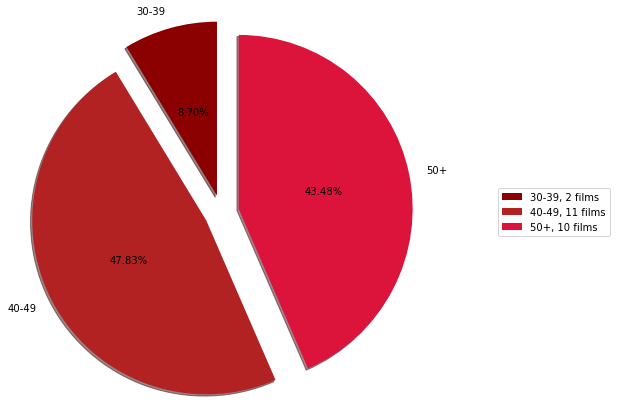

In [93]:
labels = ['30-39', '40-49', '50+']
sizes = [above_30_mc, above_40_mc, above_50_mc]
color_set = ['darkred', 'firebrick', 'crimson']

explode = ([0.2, 0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f films' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.75, 0.5), loc='center left')

plt.show()

Nearly every single film had at least 40 reviews. The two that did not? <i>Iron Man</i> and <i>The Incredible Hulk</i>.

### What was Metacritic's most reviewed film?

In [94]:
mcudata.loc[(mcudata['Metacritic Reviews'] == max(mcudata['Metacritic Reviews']))]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
21,Avengers: Endgame,"April 26, 2019",2797800564,356000000,2441800564,7.85899,94,541,78,57,2019,181,3


### What was Metacritic's least reviewed film?

In [95]:
mcudata.loc[(mcudata['Metacritic Reviews'] == min(mcudata['Metacritic Reviews']))]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
0,Iron Man (2008 film),"May 2, 2008",585796247,140000000,445796247,4.184259,94,281,79,38,2008,126,1
1,The Incredible Hulk (film),"June 13, 2008",264770996,150000000,114770996,1.765140,67,238,61,38,2008,112,1


### What was Metacritic's average review count for the entire Infinity Saga?

In [96]:
print(f"The Infinity Saga's average number of Metacritic reviews is {round(mcudata['Metacritic Reviews'].mean())}.")

The Infinity Saga's average number of Metacritic reviews is 48.0.


### How many films had more reviews than the Metacritic average?

In [97]:
mcudata.loc[(mcudata['Metacritic Reviews'] > mcudata['Metacritic Reviews'].mean())].count()[0]

12

### Which films had more reviews than the Metacritic average?

In [98]:
mcudata.loc[(mcudata['Metacritic Reviews'] > mcudata['Metacritic Reviews'].mean())]

,Film,Date,Earning,Budget,Profit,Return,Rotten Tomatoes Ratings,Rotten Tomatoes Reviews,Metacritic Ratings,Metacritic Reviews,Year,Runtime,Phase
9,Guardians of the Galaxy (film),"August 1, 2014",772778185,195000000,577778185,3.962965,92,332,76,53,2014,122,2
10,Avengers: Age of Ultron,"May 1, 2015",1402805868,365000000,1037805868,3.843304,76,373,66,49,2015,141,2
12,Captain America: Civil War,"May 6, 2016",1153296293,230000000,923296293,5.014332,90,422,75,53,2016,147,3
13,Doctor Strange (2016 film),"November 4, 2016",677718395,165000000,512718395,4.107384,89,382,72,49,2016,115,3
15,Spider-Man: Homecoming,"July 7, 2017",880166924,175000000,705166924,5.029525,92,393,73,51,2017,133,3
16,Thor: Ragnarok,"November 3, 2017",853977126,180000000,673977126,4.744317,93,434,74,51,2017,130,3
17,Black Panther (film),"February 16, 2018",1347280161,200000000,1147280161,6.736401,96,523,88,55,2018,134,3
18,Avengers: Infinity War,"April 27, 2018",2048359754,325000000,1723359754,6.302645,85,480,68,54,2018,149,3
19,Ant-Man and the Wasp,"July 6, 2018",622674139,162000000,460674139,3.843668,87,435,70,56,2018,118,3
20,Captain Marvel (film),"March 8, 2019",1128275263,150000000,978275263,7.521835,79,537,64,56,2019,124,3


Every single entry from <i>Phase Three</i> had more reviews than average with the exception of one. That film? <i>Guardians of the Galaxy Vol. 2</i>.

That's the entire <i>Infinity Saga</i> covered! <br>
So! Let's talk about the <b>Avengers</b>.

### How much did each of the Avengers film earn and cost?

In [99]:
avengersfilm = [mcudata['Film'][i] for i in range(len(mcudata['Film'])) if re.search(r'\bAvengers\b', mcudata['Film'][i])]

avengersfilmlist = mcudata.loc[(mcudata['Film'].isin(avengersfilm))]['Film'].to_list()
avengersfilmearning = mcudata.loc[(mcudata['Film'].isin(avengersfilm))]['Earning'].to_list()
avengersfilmcost = mcudata.loc[(mcudata['Film'].isin(avengersfilm))]['Budget'].to_list()

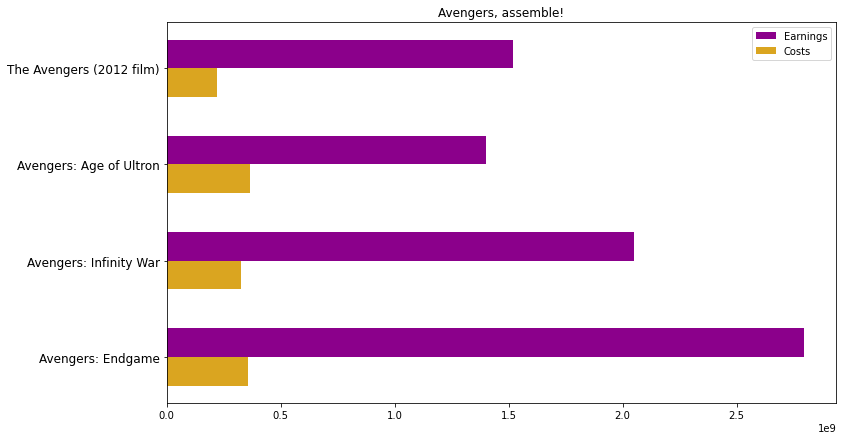

In [100]:
plt.figure(figsize=(12,7))
width = 0.3

plt.title('Avengers, assemble!')
plt.barh(np.arange(len(avengersfilmlist))+width/2, avengersfilmearning[::-1], width, label='Earnings', color='darkmagenta')
plt.barh(np.arange(len(avengersfilmlist))-width/2, avengersfilmcost[::-1], width, label='Costs', color='goldenrod')
plt.yticks(range(len(avengersfilmlist)-1,-1,-1), avengersfilmlist, rotation='horizontal', size=12)

plt.legend()

plt.show()

In [101]:
print(f'{avengersfilmlist[0]} earned ${avengersfilmearning[0]} and cost ${avengersfilmcost[0]}.')
print(f'{avengersfilmlist[1]} earned ${avengersfilmearning[1]} and cost ${avengersfilmcost[1]}.')
print(f'{avengersfilmlist[2]} earned ${avengersfilmearning[2]} and cost ${avengersfilmcost[2]}.')
print(f'{avengersfilmlist[3]} earned ${avengersfilmearning[3]} and cost ${avengersfilmcost[3]}.')

The Avengers (2012 film) earned $1518815515 and cost $220000000.
Avengers: Age of Ultron earned $1402805868 and cost $365000000.
Avengers: Infinity War earned $2048359754 and cost $325000000.
Avengers: Endgame earned $2797800564 and cost $356000000.


It looks like <i>Avengers: Age of Ultron</i> was the worst performing entry in the series and <i>Avengers: Endgame</i> was the best performing entry in the series.

### How much profit did each Avengers film make?

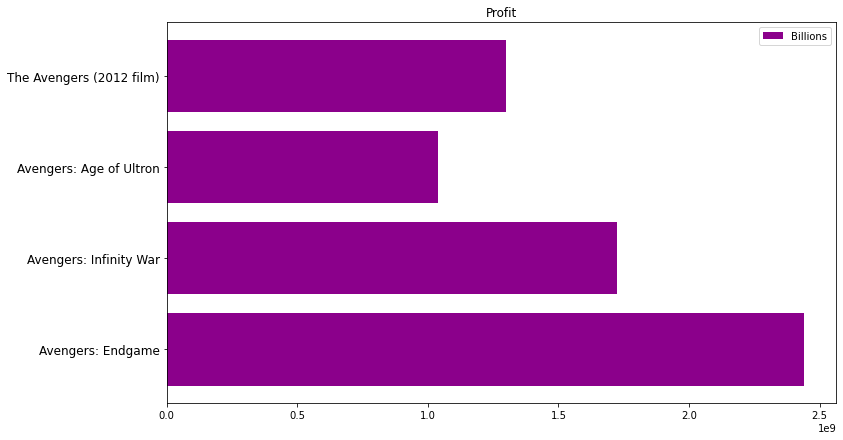

In [102]:
avengersfilmprofit = mcudata.loc[(mcudata['Film'].isin(avengersfilm))]['Profit'].to_list()

plt.figure(figsize=(12,7))

plt.title('Profit')
plt.barh(np.arange(len(avengersfilm)), avengersfilmprofit[::-1], label='Billions', color='darkmagenta')
plt.yticks(range(len(avengersfilm)-1,-1,-1), avengersfilm, rotation='horizontal', size=12)

plt.legend()

plt.show()

In [103]:
print(f'{avengersfilmlist[0]} made ${avengersfilmprofit[0]} in profit.')
print(f'{avengersfilmlist[1]} made ${avengersfilmprofit[1]} in profit.')
print(f'{avengersfilmlist[2]} made ${avengersfilmprofit[2]} in profit.')
print(f'{avengersfilmlist[3]} made ${avengersfilmprofit[3]} in profit.')

The Avengers (2012 film) made $1298815515 in profit.
Avengers: Age of Ultron made $1037805868 in profit.
Avengers: Infinity War made $1723359754 in profit.
Avengers: Endgame made $2441800564 in profit.


Every film surpassed a billion dollars in profit, and <i>Avengers: Endgame</i> greatly surpassed two billion dollars.

### How much did each Avengers film profit on average?

In [104]:
avengersfilmavg = mcudata.loc[(mcudata['Film'].isin(avengersfilm))]['Profit'].mean()
print(f'Each Avengers film averaged ${avengersfilmavg} in profit.')

Each Avengers film averaged $1625445425.25 in profit.


<b>1.6</b> billion dollars! This is more of a testament of just how much both <i>Avengers: Infinity War</i> and <i>Avengers: Endgame</i> raked in!

### How much more profit do the Avengers make compared to the rest of the cinematic universe?

In [105]:
mcufilmavg = mcudata['Profit'].mean()
print(f"The Infinity Saga makes ${round(mcufilmavg, 2)} profit on average.")
print(f"The Avengers make ${round(avengersfilmavg, 2)} profit on average.")
print(f'So the Avengers make ${round(avengersfilmavg-mcufilmavg, 2)} more on average.')

The Infinity Saga makes $787319872.17 profit on average.
The Avengers make $1625445425.25 profit on average.
So the Avengers make $838125553.08 more on average.


### How much of the Avengers films make up the total profit of the Infinity Saga?

In [106]:
avengersprofitsum = mcudata.loc[(mcudata['Film'].isin(avengersfilm))]['Profit'].sum()
mcuprofitsum = mcudata['Profit'].sum()

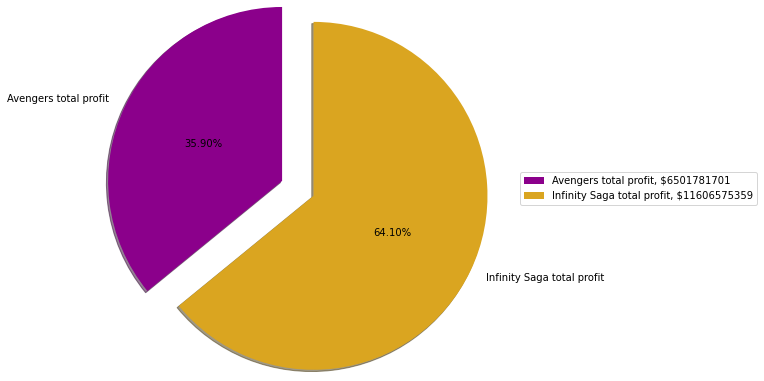

In [107]:
labels = ['Avengers total profit', 'Infinity Saga total profit']
sizes = [avengersprofitsum, mcuprofitsum-avengersprofitsum]
color_set = ['darkmagenta', 'goldenrod']

explode = ([0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, \$%1.0f' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.5, 0.5), loc='center left')

plt.show()

The four <i>Avengers</i> films make up over a <b>third</b> of the total profit of the entire <i>Infinity Saga</i>.

## Credits
Special thanks to the entire studio for making it happen. Many more thanks to the actors/actresses
- Robert Downey Jr.
- Chris Evans
- Chris Hemsworth
- Scarlett Johansson
- Mark Ruffalo
- Jeremy Renner
- Tom Hiddleston

and many others for all the great memories and moments. It has been a hell of an adventure. Love you 3000.